In [20]:
# Importamos las librerias y cargamos nuestro archivo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
pd.set_option('display.max_columns', None)

df= pd.read_csv('data_limpia.csv')

In [13]:
df.head()

,id,title,genres,release_date,release_year,actores,director,budget,revenue,return,original_language,overview,popularity,runtime,status,tagline,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,belongs_to_collection_poster_path,belongs_to_collection_backdrop_path,spoken_languages_iso_639_1,spoken_languages_name,production_companies_id,production_companies_name,production_countries_iso_3166_1,production_countries_name,release_day
0,862,Toy Story,Animation|Comedy|Family,1995-10-30,1995,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,30000000,373554033.0,12.451801,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,Released,NaN,7.7,5415.0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,en,English,3.0,Pixar Animation Studios,US,United States of America,Monday
1,8844,Jumanji,Adventure|Fantasy|Family,1995-12-15,1995,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,65000000,262797249.0,4.043035,en,When siblings Judy and Peter discover an encha...,17.015539,104.0,Released,Roll the dice and unleash the excitement!,6.9,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States of America,Friday
2,15602,Grumpier Old Men,Romance|Comedy,1995-12-22,1995,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,0,0.0,0.000000,en,A family wedding reignites the ancient feud be...,11.712900,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,en,English,NaN,NaN,US,United States of America,Friday
3,31357,Waiting to Exhale,Comedy|Drama|Romance,1995-12-22,1995,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,16000000,81452156.0,5.090760,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,127.0,Released,Friends are the people who let you be yourself...,6.1,34.0,NaN,NaN,NaN,NaN,en,English,306.0,Twentieth Century Fox Film Corporation,US,United States of America,Friday
4,11862,Father of the Bride Part II,Comedy,1995-02-10,1995,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,0,76578911.0,0.000000,en,Just when George Banks has recovered from his ...,8.387519,106.0,Released,Just When His World Is Back To Normal... He's ...,5.7,173.0,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,en,English,NaN,NaN,US,United States of America,Friday


In [14]:
#Hago una exploracion a los tipos de los datos 
df.describe()

,id,release_year,budget,revenue,return,popularity,runtime,vote_average,vote_count,belongs_to_collection_id,production_companies_id
count,45452.000000,45452.000000,4.545200e+04,4.545200e+04,4.545200e+04,45452.000000,45206.000000,45452.000000,45452.000000,3171.000000,16503.000000
mean,107991.064926,1991.882579,4.231201e+06,1.121905e+07,6.589397e+02,2.926828,94.179821,5.623962,109.987283,158579.776727,14496.738593
std,112118.576134,24.057750,1.742923e+07,6.433916e+07,7.463082e+04,6.006405,38.331639,1.915585,491.347202,136319.576349,21161.380492
min,2.000000,1874.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
25%,26367.750000,1978.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.389040,85.000000,5.000000,3.000000,44215.000000,1569.000000
50%,59872.000000,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.131324,95.000000,6.000000,10.000000,115776.000000,6194.000000
75%,156330.500000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.694242,107.000000,6.800000,34.000000,252141.500000,15165.000000
max,469172.000000,2020.000000,3.800000e+08,2.787965e+09,1.239638e+07,547.488298,1256.000000,10.000000,14075.000000,479888.000000,96067.000000


In [27]:
# Cambio el tipo de datos de algunas columnas 

df['id'] = df['id'].astype(str)
df["release_year"] = pd.to_datetime(df["release_year"], format="%Y")
df["release_date"] = pd.to_datetime(df["release_date"])
df['belongs_to_collection_id'] = df['belongs_to_collection_id'].astype(str)
df['production_companies_id'] = df['production_companies_id'].astype(str)
df["month"] = df["release_date"].dt.month
df["day"] = df["release_date"].dt.day

In [16]:
# Trato los valores faltantes igualandolos a 0
df= df.fillna(0)
df.isnull().sum()

id                                     0
title                                  0
genres                                 0
release_date                           0
release_year                           0
actores                                0
director                               0
budget                                 0
revenue                                0
return                                 0
original_language                      0
overview                               0
popularity                             0
runtime                                0
status                                 0
tagline                                0
vote_average                           0
vote_count                             0
belongs_to_collection_id               0
belongs_to_collection_name             0
belongs_to_collection_poster_path      0
belongs_to_collection_backdrop_path    0
spoken_languages_iso_639_1             0
spoken_languages_name                  0
production_compa

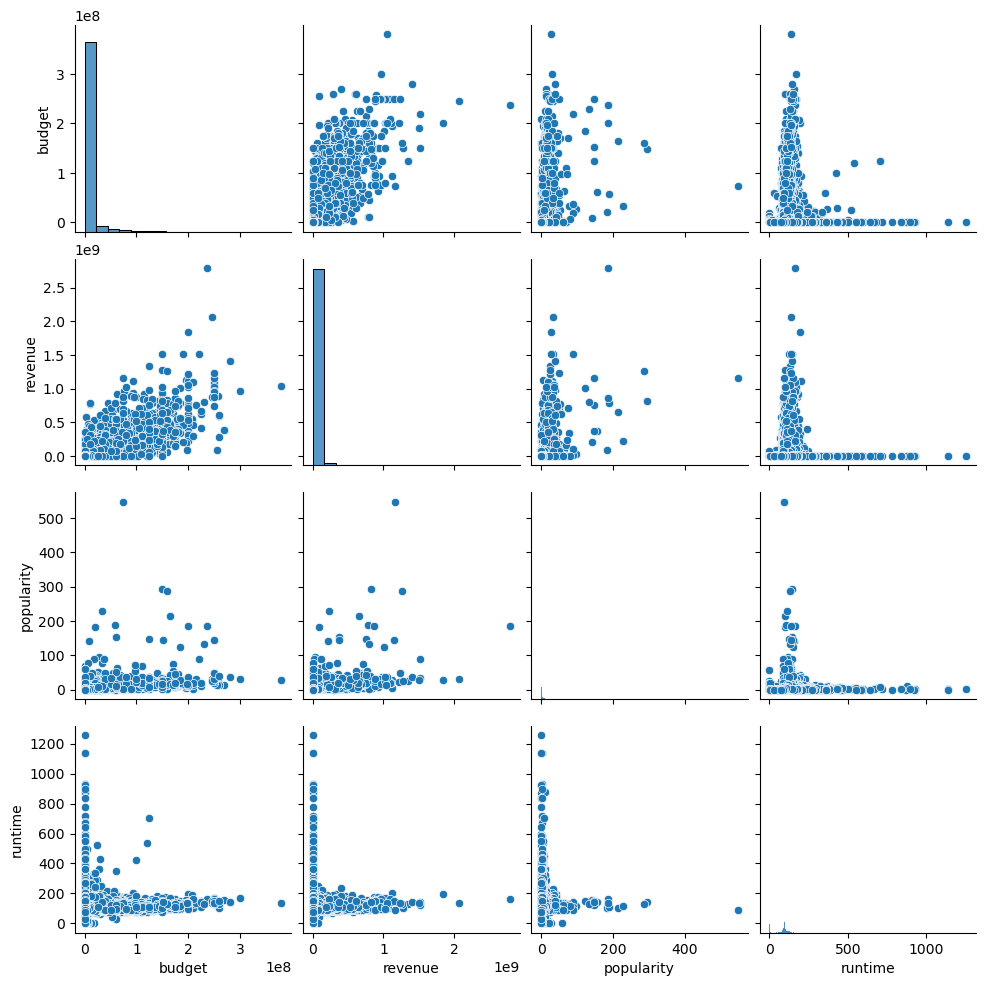

In [17]:
sns.pairplot(df[['budget', 'revenue', 'popularity', 'runtime']])
plt.show()

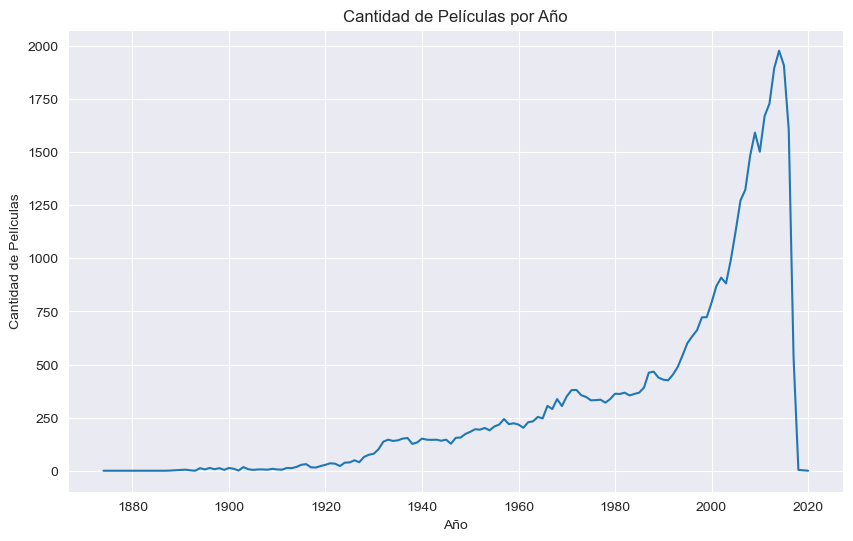

In [25]:
movies_per_year = df.groupby(df["release_year"].dt.year)["title"].count()
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=movies_per_year)
plt.xlabel("Año")
plt.ylabel("Cantidad de Películas")
plt.title("Cantidad de Películas por Año")
plt.show()

In [28]:
movies_per_month = df["month"].value_counts().sort_index()
movies_per_day = df["day"].value_counts().sort_index()

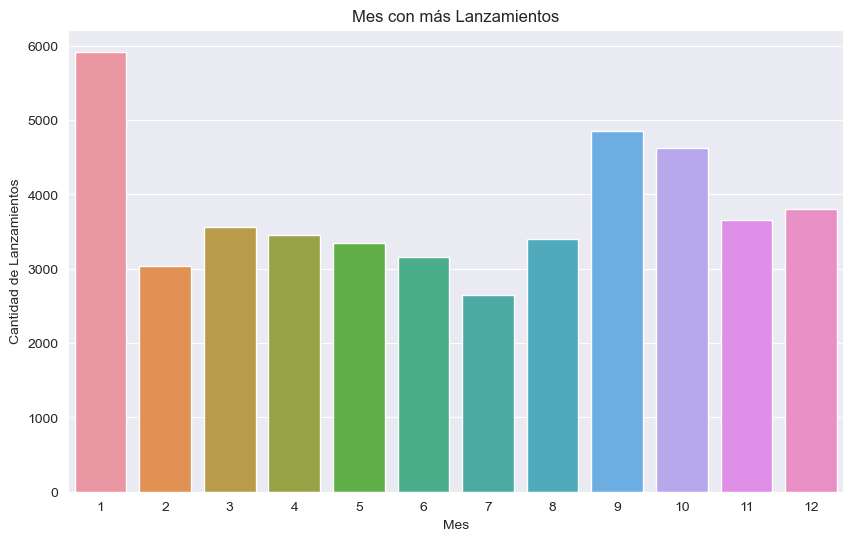

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=movies_per_month.index, y=movies_per_month.values)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Lanzamientos")
plt.title("Mes con más Lanzamientos")
plt.show()

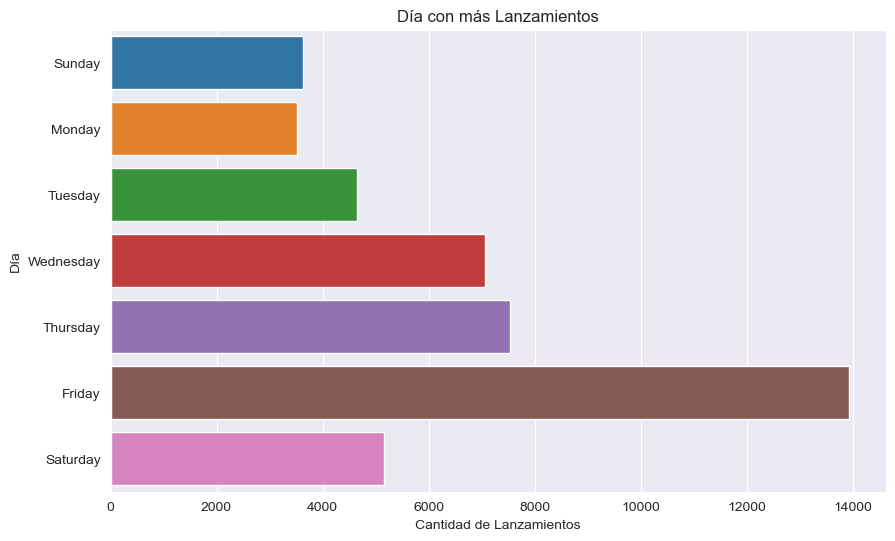

In [31]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Ordenar las categorías de la columna "release_day" según el orden establecido
df["release_day"] = pd.Categorical(df["release_day"], categories=order, ordered=True)

# Generar el gráfico de barras horizontales
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y="release_day", data=df, order=order)
plt.xlabel("Cantidad de Lanzamientos")
plt.ylabel("Día")
plt.title("Día con más Lanzamientos")
plt.show()

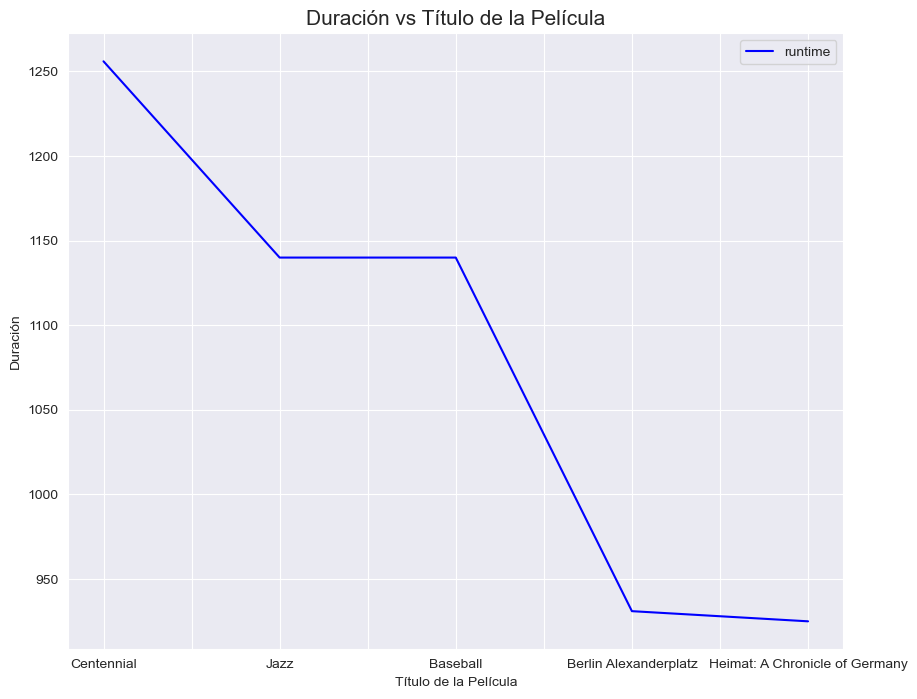

In [47]:
df.nlargest(5, 'runtime').plot.line(y='runtime', x='title', color='blue', figsize=(10, 8))
plt.title("Duración vs Título de la Película", fontsize=15)
plt.xlabel('Título de la Película', fontsize=10)
plt.ylabel('Duración', fontsize=10)
plt.show()


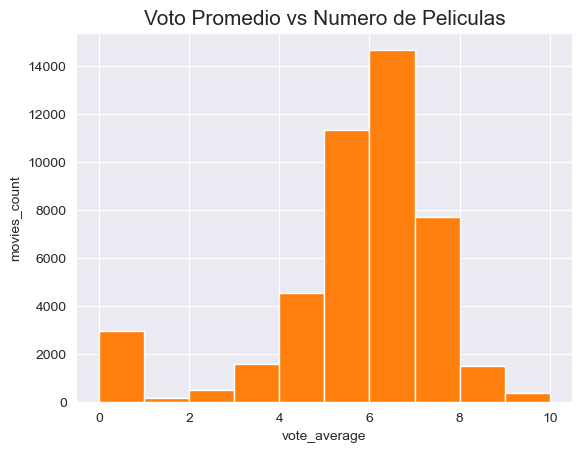

In [49]:
df['vote_average'].hist()
plt.title("Voto Promedio vs Numero de Peliculas",fontsize = 15)
plt.ylabel('movies_count',fontsize = 10)
plt.xlabel('vote_average',fontsize = 10)
plt.show()

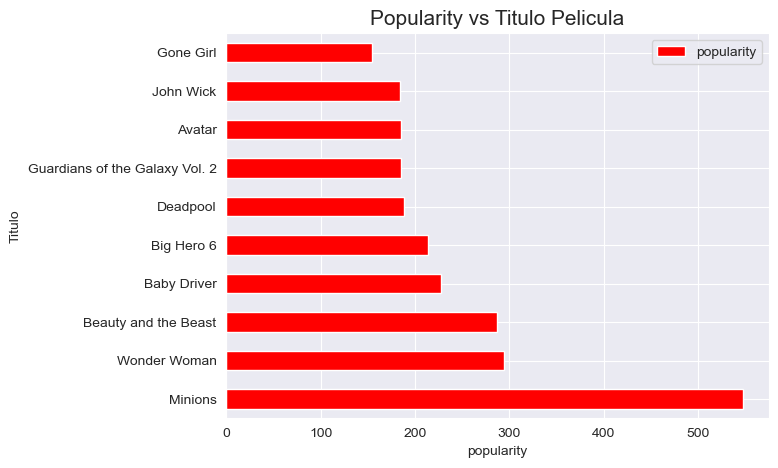

In [52]:
df.nlargest(10,'popularity').plot.barh(y='popularity',x='title',color='red', figsize=(7,5));
plt.title("Popularity vs Titulo Pelicula",fontsize = 15)
plt.ylabel('Titulo',fontsize = 10)
plt.xlabel('popularity',fontsize = 10);
plt.show()

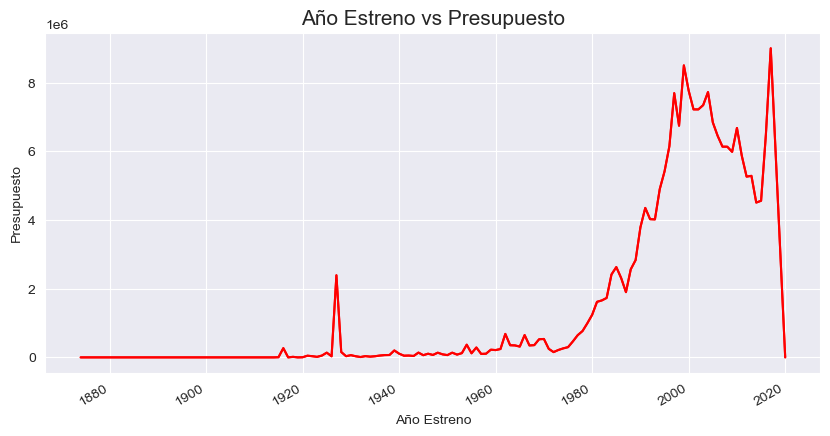

In [55]:
df.groupby('release_year')['budget'].mean().plot(figsize=(10,5),color='red')
plt.title("Año Estreno vs Presupuesto",fontsize = 15)
plt.xlabel('Año Estreno',fontsize = 10)
plt.ylabel('Presupuesto',fontsize = 10)
plt.show()

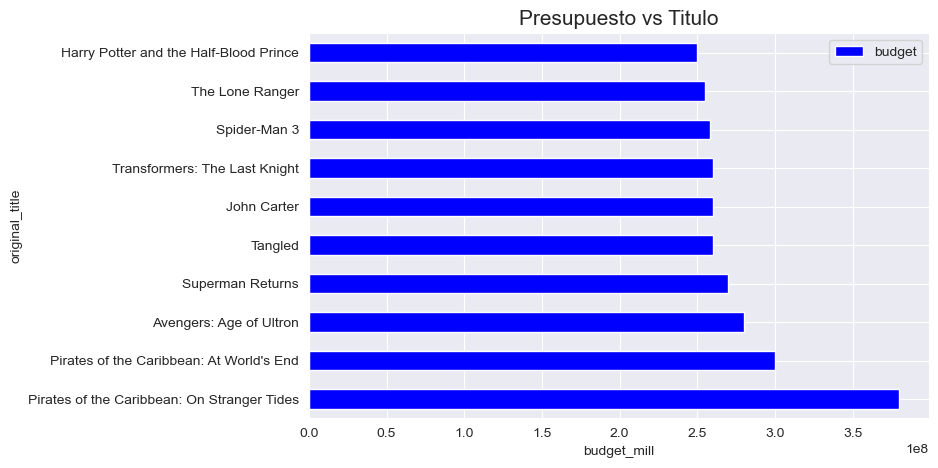

In [60]:

df.nlargest(10,'budget').plot.barh(y='budget',x='title',color='blue', figsize=(8,5));
plt.title("Presupuesto vs Titulo",fontsize = 15)
plt.ylabel('original_title',fontsize = 10)
plt.xlabel('budget_mill',fontsize = 10)
plt.show()

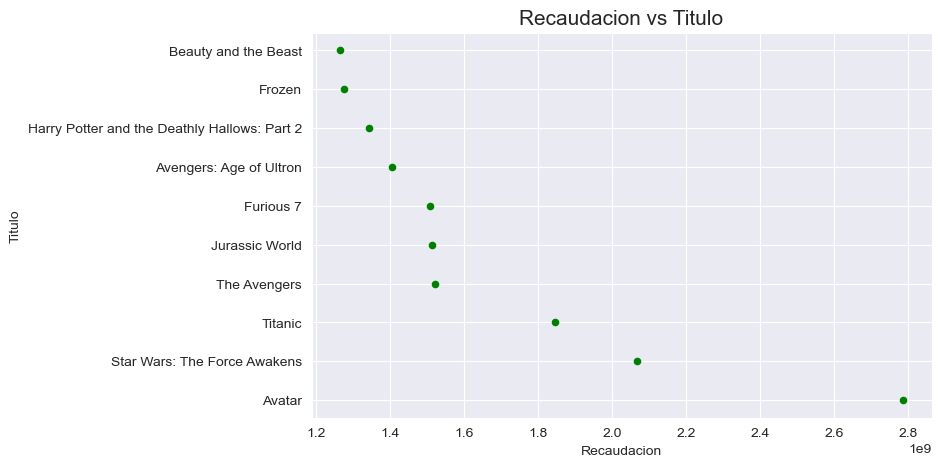

In [61]:
df.nlargest(10,'revenue').plot.scatter(x='revenue',y='title',color='green', figsize=(8,5));
plt.title("Recaudacion vs Titulo",fontsize = 15)
plt.ylabel('Titulo',fontsize = 10)
plt.xlabel('Recaudacion',fontsize = 10)
plt.show()

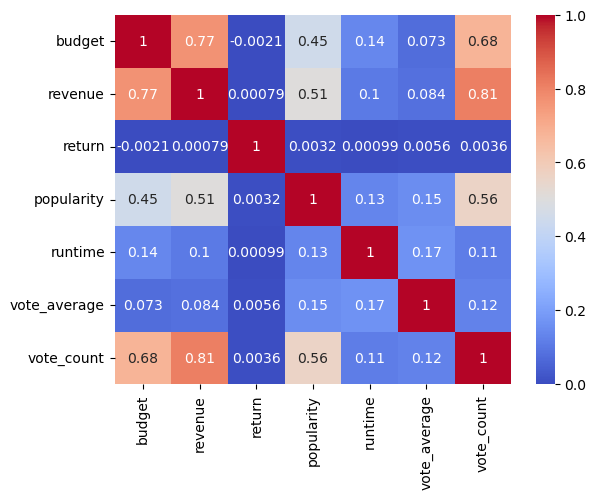

In [9]:
# Creo la matriz de correlacion y ploteo para hacer un mapa de calor
corr_matrix = df.corr()


sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

plt.show()

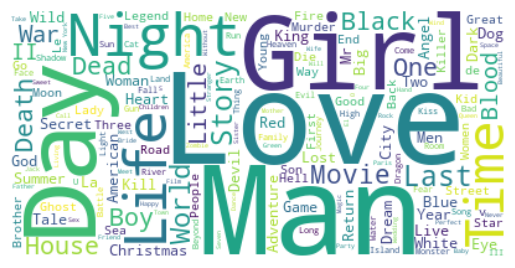

In [10]:
# Hago una nube de palabras para ver cuales son las que mas se repiten 
text = " ".join(title for title in df.title)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Conclusiones

## A partir del análisis anterior, podemos obtener las siguientes conclusiones:

### El mayor número de lanzamientos de películas se registró en los años 2013-2014.
### La mayoría de las películas de este conjunto de datos se lanzaron en septiembre.
### En cuanto a popularidad, 'Jurassic World' obtuvo la calificación más alta y 'The Hospital' la más baja.
### 'Taken' fue la película más larga, con una duración de aproximadamente 900 minutos, mientras que 5 películas tuvieron la duración más corta de 3 minutos.
### En términos de votos promedio, 'Pink Floyd: Pulse' recibió la calificación más alta, con un voto de 8.7, mientras que 'Transmorphers' y 'Manos' recibieron la calificación más baja, de aproximadamente 1.5.
### El presupuesto de la película 'The Warrior's Way' fue el más alto, de aproximadamente 450 millones de dólares, mientras que fue de solo 0.01 millones de dólares para otras 7 películas.
### Los ingresos más altos se registraron en la película 'Star Wars', con aproximadamente 2100 millones de dólares.
### La película 'Star Wars' obtuvo el mayor beneficio, de aproximadamente 1850 millones de dólares. El beneficio fue negativo para 1025 películas, lo que indica que su presupuesto fue mucho más alto que sus ingresos.
### En general, el presupuesto de las películas ha aumentado de aproximadamente 1 millón de dólares en 1960 a alrededor de 30 millones de dólares en 2000. Según estos datos, el presupuesto ha disminuido desde entonces, siendo de aproximadamente 14 millones de dólares en 2015.
### En cuanto a los géneros, la categoría de drama lideró hasta 2015.
Nota: Estas conclusiones se basan en el conjunto de datos analizado y pueden variar dependiendo de la calidad y la representatividad de los datos utilizados.